# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(f"The Mitochondria is the Powerhouse of the Cell")

The Mitochondria is the Powerhouse of the Cell


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# what temp units to you want?
temp_units = "imperial"
# query url to pull from
query_url = "http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=" + weather_api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# start the call counter to count up
counter = 1

In [7]:
# loop through the cities in the city list 
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:  
    try: 
        # response from api to pull
        response = requests.get(f"{query_url}&q={city}").json() 
        
        # append all the lists and pull relevant data
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_counter = response["name"]
        
        print(f"Processing {counter} | {city_counter}")
        print(f"{query_url}&q={city}")
        
        # increase counter by 1 to go to next
        counter += 1
        
    # skip to the next call if nothing found
    except:
        print("City not found...")
    continue
print(f"--------End--------")

Beginning Data Retrieval
------------------------
Processing 1 | Barrow
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=barrow
Processing 2 | Mardin
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=mardin
Processing 3 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=new norfolk
Processing 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=bluff
Processing 5 | Khandyga
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=khandyga
Processing 6 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3af960f713dfe93ef26f91d839e4&q=qaanaaq
City not found...
Processing 7 | Barcelos
http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID=b43a3a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# need to compile data so make a dictionary with all the data in it
weather = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
# make data frame
weather_df = pd.DataFrame(weather)
# check data frame
weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Barrow,75,US,1587516496,78,71.29,-156.79,264.15,4.60
1,Mardin,98,TR,1587516496,47,37.31,40.74,287.69,2.79
2,New Norfolk,40,AU,1587516496,69,-42.78,147.06,285.93,1.79
3,Bluff,96,NZ,1587516496,84,-46.60,168.33,285.93,1.34
4,Khandyga,49,RU,1587516496,91,62.67,135.60,268.28,1.03


In [9]:
# check data frame to make sure everything is correct
weather_df.count()
# output to a csv
weather_df.to_csv('../output_data/weather_data.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

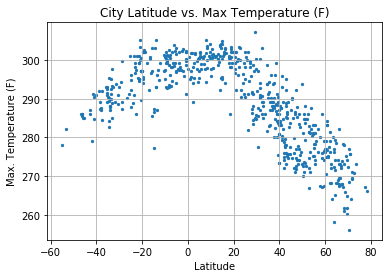

In [10]:
# Build a scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", s=5)

# make it pretty
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

# save it
plt.savefig("../output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

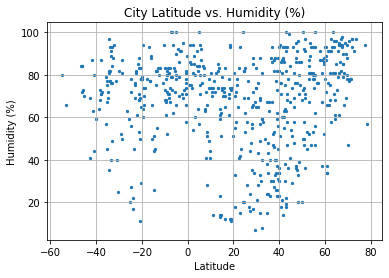

In [11]:
# Build a scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=5)

# make it pretty
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save it
plt.savefig("../output_data/Max_Temp_vs_Humidity(%).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

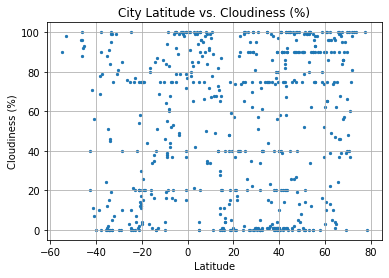

In [12]:
# Build a scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=5)

# make it pretty
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save it
plt.savefig("../output_data/Max_Temp_vs_Cloudiness(%).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

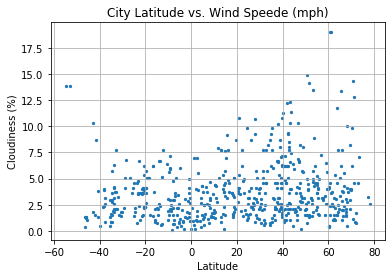

In [13]:
# Build a scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=5)

# make it pretty
plt.title("City Latitude vs. Wind Speede (mph)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save it
plt.savefig("../output_data/Max_Temp_vs_Wind Speede(mph).png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# north and south data frames filtered on latitude
north = weather_df[weather_df["Latitude"] > 0]
south = weather_df[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

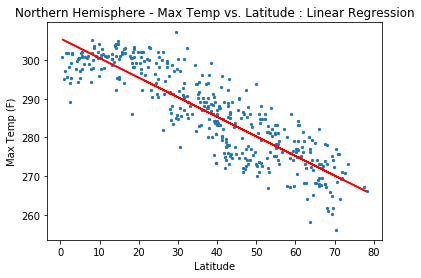

R-squared: -0.871
y = -0.51x + 305.55


<Figure size 432x288 with 0 Axes>

In [16]:
corr_coeff = st.pearsonr(north["Latitude"], north["Max Temp"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = north["Latitude"]
y_values = north["Max Temp"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=5)
plt.plot(x_values,regress_values, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude : Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude : Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

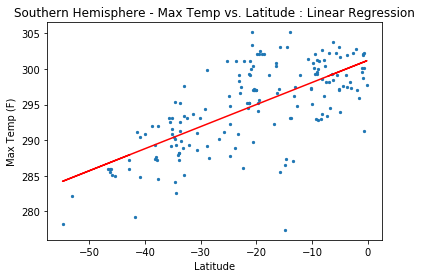

R-squared: 0.689
y = 0.31x + 301.19


<Figure size 432x288 with 0 Axes>

In [17]:
corr_coeff = st.pearsonr(south["Latitude"], south["Max Temp"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = south["Latitude"]
y_values = south["Max Temp"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=5)
plt.plot(x_values,regress_values, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude : Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude : Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

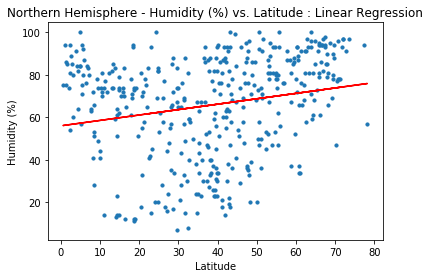

R-squared: 0.211
y = 0.25x + 55.98


<Figure size 432x288 with 0 Axes>

In [18]:
corr_coeff = st.pearsonr(north["Latitude"], north["Humidity"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = north["Latitude"]
y_values = north["Humidity"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude : Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude : Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

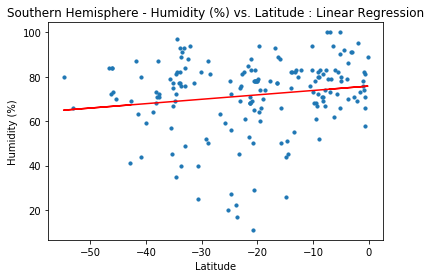

R-squared: 0.155
y = 0.2x + 75.76


<Figure size 432x288 with 0 Axes>

In [19]:
corr_coeff = st.pearsonr(south["Latitude"], south["Humidity"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = south["Latitude"]
y_values = south["Humidity"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude : Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude : Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

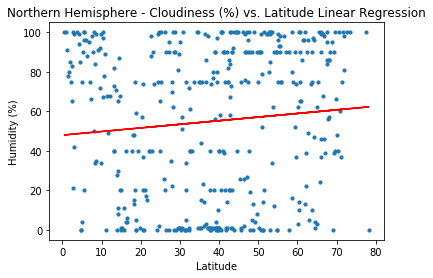

R-squared: 0.095
y = 0.18x + 47.96


<Figure size 432x288 with 0 Axes>

In [20]:
corr_coeff = st.pearsonr(north["Latitude"], north["Cloudiness"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = north["Latitude"]
y_values = north["Cloudiness"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

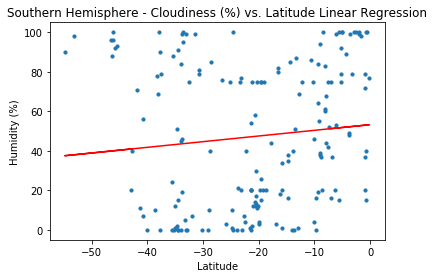

R-squared: 0.105
y = 0.29x + 53.25


<Figure size 432x288 with 0 Axes>

In [21]:
corr_coeff = st.pearsonr(south["Latitude"], south["Cloudiness"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = south["Latitude"]
y_values = south["Cloudiness"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

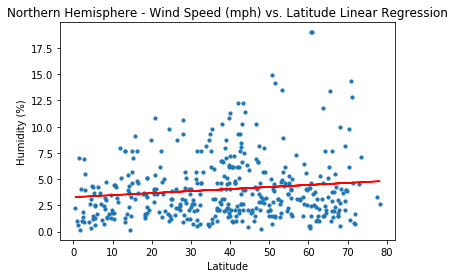

R-squared: 0.129
y = 0.02x + 3.28


<Figure size 432x288 with 0 Axes>

In [22]:
corr_coeff = st.pearsonr(north["Latitude"], north["Wind Speed"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = north["Latitude"]
y_values = north["Wind Speed"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

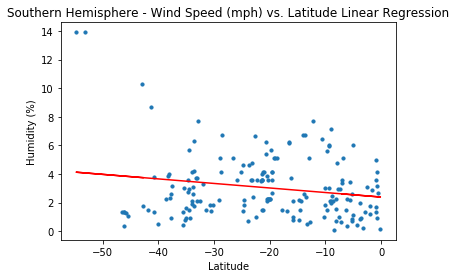

R-squared: -0.188
y = -0.03x + 2.38


<Figure size 432x288 with 0 Axes>

In [23]:
corr_coeff = st.pearsonr(south["Latitude"], south["Wind Speed"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = south["Latitude"]
y_values = south["Wind Speed"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values, marker="o", s=10)
plt.plot(x_values,regress_values, "r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# print
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")